In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings

# Preprocessing

In [25]:
warnings.filterwarnings('ignore')
df = pd.read_csv('D3.csv')

In [26]:
missing_values = df.isna() 
print(missing_values.sum())

race                        1016
gender                         0
age                           10
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
medical_specialty              0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 9
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
insulin                        0
change                         0
diabetesMed                    0
readmitted                     0
dtype: int

In [27]:
df = df.dropna(subset=["race", "chlorpropamide", "age"])

In [28]:
missing_values = df.isna() 
print(missing_values.sum())

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50732 entries, 0 to 51765
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      50732 non-null  object
 1   gender                    50732 non-null  object
 2   age                       50732 non-null  object
 3   admission_type_id         50732 non-null  int64 
 4   discharge_disposition_id  50732 non-null  int64 
 5   admission_source_id       50732 non-null  int64 
 6   time_in_hospital          50732 non-null  int64 
 7   medical_specialty         50732 non-null  object
 8   num_lab_procedures        50732 non-null  int64 
 9   num_procedures            50732 non-null  int64 
 10  num_medications           50732 non-null  int64 
 11  number_outpatient         50732 non-null  int64 
 12  number_emergency          50732 non-null  int64 
 13  number_inpatient          50732 non-null  int64 
 14  number_diagnoses      

In [30]:
df['tolbutamide'].unique()

array(['No'], dtype=object)

In [31]:
df['acetohexamide'].unique()

array(['No'], dtype=object)

In [32]:
df.drop(['acetohexamide', 'tolbutamide'], axis=1, inplace=True)
df.drop(['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50732 entries, 0 to 51765
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   race                50732 non-null  object
 1   gender              50732 non-null  object
 2   age                 50732 non-null  object
 3   time_in_hospital    50732 non-null  int64 
 4   medical_specialty   50732 non-null  object
 5   num_lab_procedures  50732 non-null  int64 
 6   num_procedures      50732 non-null  int64 
 7   num_medications     50732 non-null  int64 
 8   number_outpatient   50732 non-null  int64 
 9   number_emergency    50732 non-null  int64 
 10  number_inpatient    50732 non-null  int64 
 11  number_diagnoses    50732 non-null  int64 
 12  max_glu_serum       50732 non-null  object
 13  A1Cresult           50732 non-null  object
 14  metformin           50732 non-null  object
 15  repaglinide         50732 non-null  object
 16  nateglinide         50

In [34]:
from sklearn.preprocessing import StandardScaler

# mapping
df['age']=df['age'].astype(str)
age_map = {'[80-90)':9, '[70-80)':8, '[50-60)':6, '[40-50)':5, '[60-70)':7, 
'[90-100)':1, '[30-40)':4,'[10-20)':2, '[20-30)':3, '[0-10)':1}
df['age'] = df['age'].map(age_map)
df['readmitted'] = df['readmitted'].astype(bool)

df = pd.get_dummies(df)

y = df['readmitted']
X = df.drop(['readmitted'], axis=1)
X_mat = X.to_numpy()


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50732 entries, 0 to 51765
Columns: 112 entries, age to insulin_Up
dtypes: bool(3), int64(9), uint8(100)
memory usage: 8.9 MB


In [36]:
rs = 10
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

# Decision Tree with Default Setting

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [38]:
rs = 10
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

# print model parameters
print(model.get_params(deep = True))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 10, 'splitter': 'best'}


In [39]:
print("Train accuracy:", model.score(X_train, y_train))

Train accuracy: 0.9999436810092364


In [40]:
print("Test accuracy:", model.score(X_test, y_test))

Test accuracy: 0.549802890932983


In [41]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.58      0.58      0.58      8184
        True       0.51      0.52      0.52      7036

    accuracy                           0.55     15220
   macro avg       0.55      0.55      0.55     15220
weighted avg       0.55      0.55      0.55     15220



In [42]:
treeObj = model.tree_
print(treeObj.node_count)
print(treeObj.n_leaves)

20817
10409


In [43]:
model.get_params(deep = True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

In [44]:
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
indices = indices[:10]
for i in indices:
    print(feature_names[i], ':', importances[i])

num_lab_procedures : 0.17683239849533594
num_medications : 0.1449038880209787
time_in_hospital : 0.09083801246483884
number_inpatient : 0.0681882639992299
age : 0.05429642322752682
number_diagnoses : 0.05252755328473344
num_procedures : 0.05216343749517779
number_outpatient : 0.025172859949673356
medical_specialty_Invalid : 0.015538407678223535
change : 0.015529232192226395


In [45]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dt_viz.png") # saved in the following file - will return True if successful

In [46]:
#retrain with a small max_depth limit

model_small = DecisionTreeClassifier(max_depth=3, random_state=rs)
model_small.fit(X_train, y_train)

print("Train accuracy:", model_small.score(X_train, y_train))
print("Test accuracy:", model_small.score(X_test, y_test))

y_pred = model_small.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.624802883532327
Test accuracy: 0.6295006570302234
              precision    recall  f1-score   support

       False       0.64      0.71      0.67      8184
        True       0.61      0.53      0.57      7036

    accuracy                           0.63     15220
   macro avg       0.63      0.62      0.62     15220
weighted avg       0.63      0.63      0.63     15220



In [47]:
first_split_feature_name = X.columns[model.tree_.feature[0]]
print("The first split is made on the feature:", first_split_feature_name)

The first split is made on the feature: number_inpatient


# Decision Tree with GridSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV

In [50]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 20),
          'min_samples_leaf': range(0, 40, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([0.03345914, 0.03089714, 0.0312957 , 0.03099697, 0.03049183,
       0.03065517, 0.03042891, 0.04534883, 0.04469242, 0.04514949,
       0.04465122, 0.04498527, 0.04534876, 0.04636431, 0.06180019,
       0.06328731, 0.06834068, 0.06282268, 0.06309187, 0.06485422,
       0.06827102, 0.08272398, 0.08913488, 0.09164469, 0.09043324,
       0.08711698, 0.08827281, 0.08288677, 0.09591429, 0.09595087,
       0.09564664, 0.09531672, 0.09448533, 0.09900753, 0.09627855,
       0.1095747 , 0.10853879, 0.11285453, 0.11029825, 0.11997836,
       0.10045056, 0.10214472, 0.11071391, 0.10788705, 0.11140542,
       0.10870023, 0.10743976, 0.10857217, 0.10793817, 0.12079628,
       0.12657235, 0.12648492, 0.11860785, 0.11856358, 0.11799455,
       0.12105041, 0.13244126, 0.13016932, 0.13189611, 0.13015118,
       0.12832429, 0.1330523 , 0.13377168, 0.14791951, 0.15287056,
       0.15230434, 0.15717287, 0.15560756, 0.14167027, 0.13239923,
       0.15100853, 0.15565314, 0.1734983 , 0

In [51]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.6342644739806262
Test accuracy: 0.6295006570302234


In [52]:
y_b_best_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_b_best_pred))

              precision    recall  f1-score   support

       False       0.64      0.73      0.68      8184
        True       0.62      0.51      0.56      7036

    accuracy                           0.63     15220
   macro avg       0.63      0.62      0.62     15220
weighted avg       0.63      0.63      0.62     15220



In [53]:
cv_1_best = cv_1.best_estimator_
print(cv_1_best)
print('Nodes: ', cv_1_best.tree_.node_count)
print('Leaves', cv_1_best.tree_.n_leaves)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=10)
Nodes:  125
Leaves 63


In [54]:
first_split_feature_name2 = X.columns[cv_1_best.tree_.feature[0]]
print("The first split is made on the feature:", first_split_feature_name2)

The first split is made on the feature: number_inpatient


In [55]:
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  266


[Text(0.5, 0.75, 'number_inpatient <= -0.146\nentropy = 0.996\nsamples = 35512\nvalue = [19094, 16418]\nclass = age'),
 Text(0.25, 0.25, '\n  (...)  \n'),
 Text(0.75, 0.25, '\n  (...)  \n')]

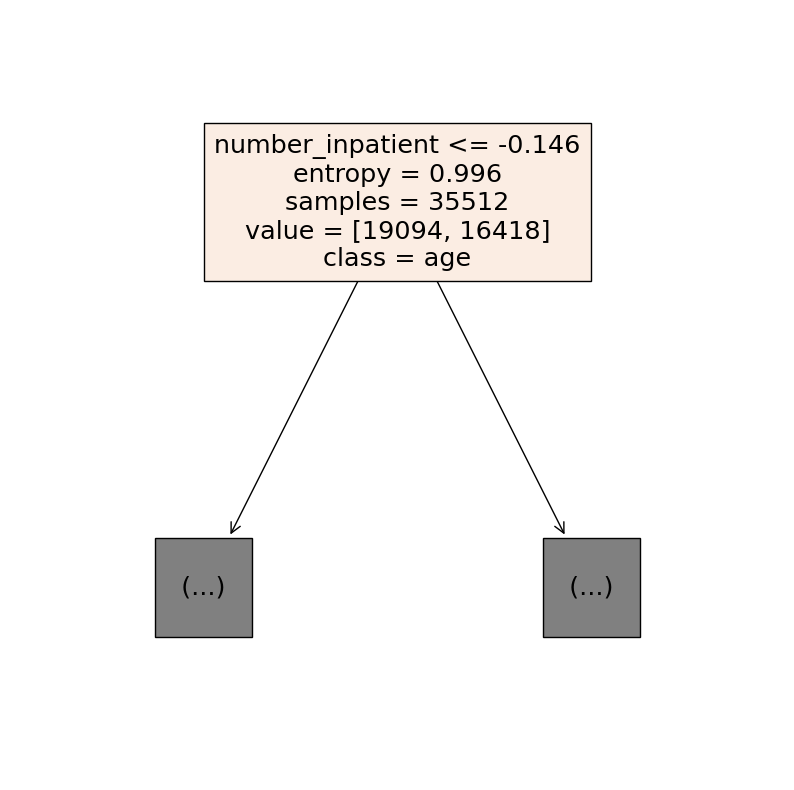

In [67]:
# Convert DataFrame column names to a list
feature_names = X.columns.tolist()

# Then, you can use this list in the plot_tree function
fig = plt.figure(figsize=(10, 10))
tree.plot_tree(cv_1_best, feature_names=feature_names, class_names=feature_names, max_depth=0, filled=True)


In [57]:
importances = cv_1_best.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
indices = indices[:10]
for i in indices:
    print(feature_names[i], ':', importances[i])

number_inpatient : 0.6381981338908856
age : 0.07327214295078206
number_emergency : 0.06782710488619006
number_outpatient : 0.04473199817364742
diabetesMed : 0.026753088800269036
number_diagnoses : 0.0265376850020693
num_lab_procedures : 0.026524174597051867
num_medications : 0.021847087608436826
medical_specialty_Invalid : 0.0160967522990542
medical_specialty_InternalMedicine : 0.009895495899597017


In [58]:
print(cv_1_best)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=10)


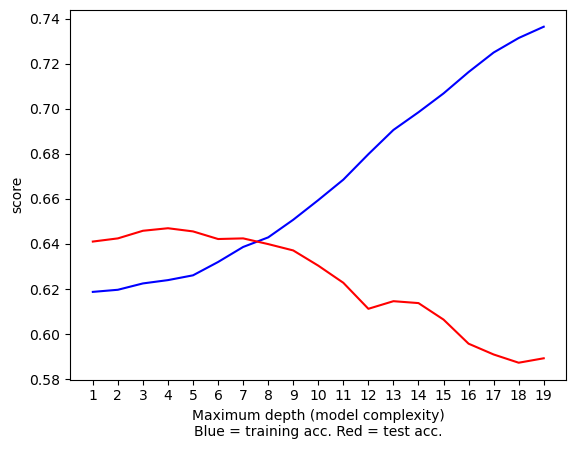

In [59]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

In [60]:
print(cv_1.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=10)


In [61]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(x_test)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.3930131004366812 	 0.6069868995633187 	 True
0.2962962962962963 	 0.7037037037037037 	 True
0.6649063850216035 	 0.33509361497839657 	 False
0.4223300970873786 	 0.5776699029126213 	 True
0.5625 	 0.4375 	 True
0.6508474576271186 	 0.34915254237288135 	 True
0.42783505154639173 	 0.5721649484536082 	 True
0.4223300970873786 	 0.5776699029126213 	 True
0.5317604355716878 	 0.46823956442831216 	 False
0.6649063850216035 	 0.33509361497839657 	 False
0.6395610579628588 	 0.3604389420371413 	 False
0.45151412044913236 	 0.5484858795508677 	 True
0.6395610579628588 	 0.3604389420371413 	 False
0.42783505154639173 	 0.5721649484536082 	 True
0.5106382978723404 	 0.48936170212765956 	 True
0.5625 	 0.4375 	 True
0.5781279309697993 	 0.4218720690302007 	 False
0.723549488054607

In [62]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(x_test)
# y_pred_proba_dt_small = model_small.predict_proba(x_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(x_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
# roc_index_dt_small = roc_auc_score(y_test, y_pred_proba_dt_small[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
# print("ROC index on test for DT_small:", roc_index_dt_small)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.5475768697168091
ROC index on test for DT_optimal: 0.6633327963657926


In [63]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
# fpr_dt_small, tpr_dt_small, thresholds_dt_small = roc_curve(y_test, y_pred_proba_dt_small[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

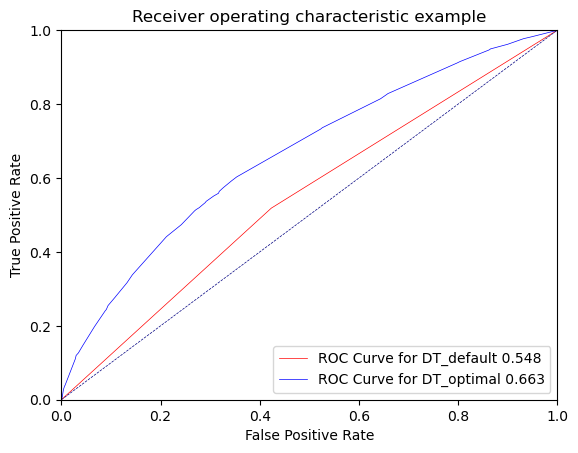

In [64]:
plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [65]:
import pickle
dt_best = cv_1
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)